In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss
from osgeo import gdal
from lib_vol2 import lib2
from scipy import fftpack
import numpy.linalg as npl
Tifpath = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3iHV_t4-7_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'
Tifpath1 = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3N0-iHV_t1_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'
gdal.UseExceptions()

ds_normal = gdal.Open(Tifpath1)
ds = gdal.Open(Tifpath)
ds_normal1 = np.array(ds_normal.GetRasterBand(1).ReadAsArray())
ds_band1 = np.array(ds.GetRasterBand(1).ReadAsArray())
ds_band3 = np.array(ds.GetRasterBand(3).ReadAsArray())


ds_normal11 = ds_normal1[10:-10, 20:-50]
ds_norm1 = ds_band1[10: -10, 20:-50]/ds_normal11
ds_norm3 = ds_band3[10: -10, 20:-50]/ds_normal11
from how2spectro_Morlet2 import morlet2
from how2spectro_Morlet2 import cwt

In [2]:
im1 = lib2(ds_band1)
im3 = lib2(ds_band3)

/home/wilhelm/INSA/4A/S2/CESBIO/lib_vol2.py:86: RuntimeWarning: divide by zero encountered in log10
  plt.plot(self._x, np.log10(self._ds_band)*10, label = "Period 1")
/home/wilhelm/INSA/4A/S2/CESBIO/lib_vol2.py:88: RuntimeWarning: divide by zero encountered in log10
  plt.plot(self._x, np.log10(other._ds_band)*10, label = "Period 3")


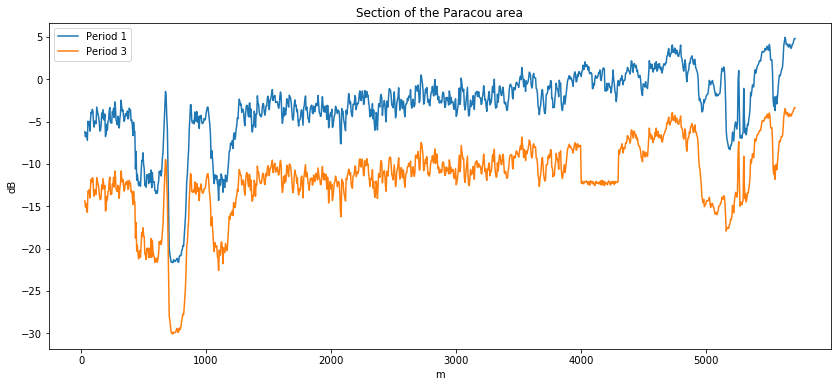

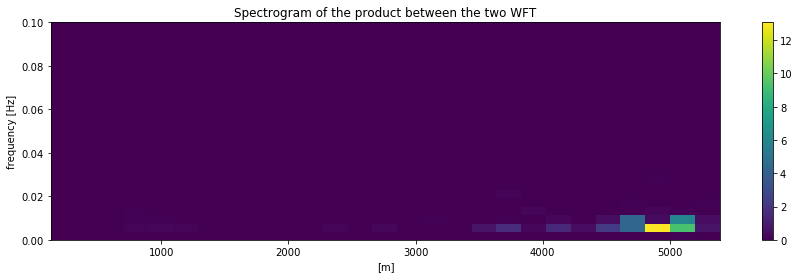

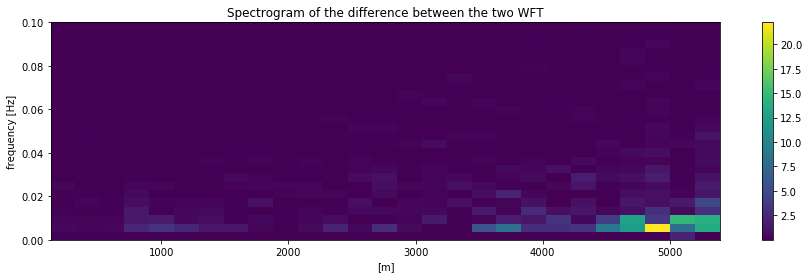

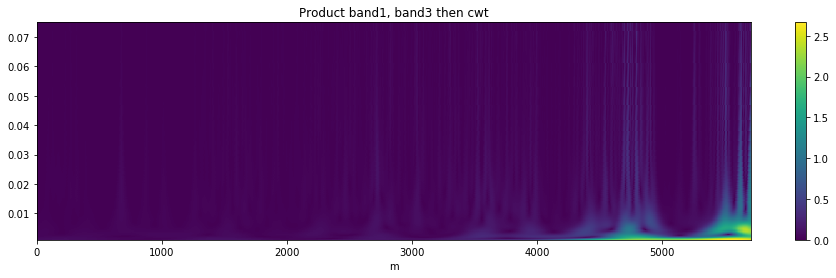

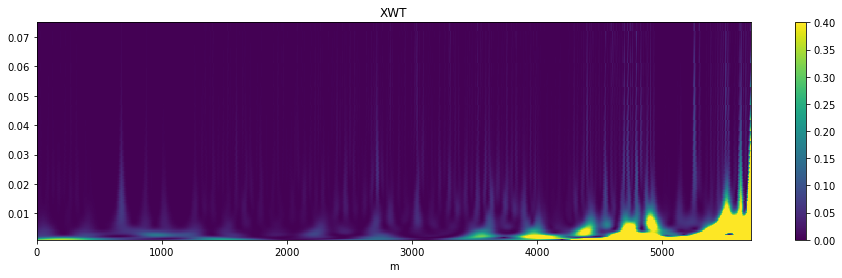

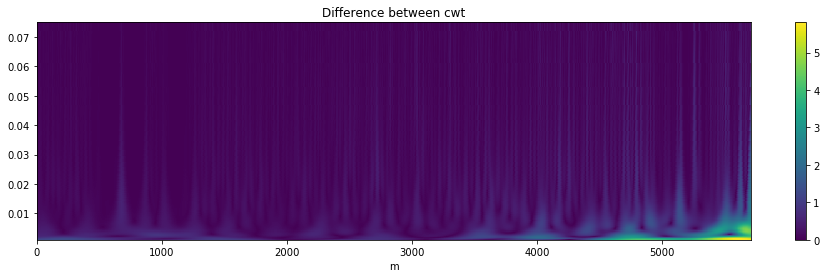

In [10]:
im3._ds_band = im3.simulate_deforestation_v2([4000,4300], mu = 0.06, sigma = np.var(im1._ds_band)/15)
im1._ds_band = im1.simulate_shift(s = 50)
im1.spectrogram(n_win = 52, plot = False)
im3.spectrogram(n_win = 52, plot = False)
im1.plot_section(im3)
im1.cross_spectro(im3, prod = True)

im1.cross_spectro(im3, diff = True)


w = 2.5
sig_prod = im1._ds_band * im3._ds_band
#im1.plot_sections(sig_prod, im3._ds_band, label1 = "product between band1, band3", label2 = "band1")
cwt1 = im1.cwt(im1._ds_band, w)
cwt2 = im3.cwt(im3._ds_band, w)
cwt3 = im1.cwt(sig_prod, w)

dcwt = np.abs(cwt1-cwt2)
pcwt = np.abs(cwt1*np.conj(cwt2))
im1.plot_cwt(cwt3, title = "Product band1, band3 then cwt")
im1.plot_cwt(pcwt, title = "XWT", vmax = 0.4)

im1.plot_cwt(dcwt, title = "Difference between cwt")

dz = np.abs(im1._spectro_Z - im3._spectro_Z)
seuil = 0.4